In [1]:
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv("employment status.csv", header = 3)
df.head(10)

,Year,Civilian\nnoninstitu-\ntional\npopulation,Civilian labor force,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Not\nin\nlabor\nforce
0,NaN,NaN,Total,Percent of\npopulation,Employed,NaN,NaN,NaN,Unemployed,NaN,NaN
1,NaN,NaN,NaN,NaN,Total,Percent of\npopulation,Agri-\nculture,Nonagri-\ncultural\nindustries,Number,Percent of\nlabor force,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990,"90,377","69,011",76.4,"65,104",72.0,"2,546","62,559","3,906",5.7,"21,367"
5,1991,"91,278","69,168",75.8,"64,223",70.4,"2,589","61,634","4,946",7.2,"22,110"
6,1992,"92,270","69,964",75.8,"64,440",69.8,"2,575","61,866","5,523",7.9,"22,306"
7,1993,"93,332","70,404",75.4,"65,349",70.0,"2,478","62,871","5,055",7.2,"22,927"
8,1994,"94,355","70,817",75.1,"66,450",70.4,"2,554","63,896","4,367",6.2,"23,538"
9,1995,"95,178","71,360",75.0,"67,377",70.8,"2,559","64,818","3,983",5.6,"23,818"


In [3]:
cols = ['Year','Civilian\nnoninstitu-\ntional\npopulation','Unnamed: 4','Unnamed: 5']       
old_names = df[cols]
new_names = ['Year','noninstitutional polulation', 'total male employment', 'employment percentage',]

names = dict(zip(old_names, new_names))
df2 = old_names.rename(columns=names)      #renaming selected columns
df2.head()

,Year,noninstitutional polulation,total male employment,employment percentage
0,NaN,NaN,Employed,NaN
1,NaN,NaN,Total,Percent of\npopulation
2,NaN,NaN,NaN,NaN
3,Men,NaN,NaN,NaN
4,1990,"90,377","65,104",72.0


In [4]:
male = df2.loc[4:37]
male = male.set_index('Year')
male.shape


(34, 3)

In [5]:
male.to_csv('male.csv')  #save cleaned male data to a csv file

In [6]:
female = df2.loc[40:73]
female = female.set_index('Year')
female.tail(5)
female.shape

(34, 3)

In [7]:
female.to_csv('female.csv')    #save cleaned female data to a csv file

*****Male vs. Female Employment Overtime*****

In [8]:
import pandas as pd
import numpy as np              
import matplotlib.pyplot as plt  
import seaborn as sns


In [9]:
male = pd.read_csv("male.csv", index_col='Year')
male.head()

,noninstitutional polulation,total male employment,employment percentage
Year,,,
1990,"90,377","65,104",72.0
1991,"91,278","64,223",70.4
1992,"92,270","64,440",69.8
1993,"93,332","65,349",70.0
1994,"94,355","66,450",70.4


In [10]:
female = pd.read_csv("female.csv",index_col='Year')
female.head()

,noninstitutional polulation,total male employment,employment percentage
Year,,,
1990,"98,787","53,689",54.3
1991,"99,646","53,496",53.7
1992,"100,535","54,052",53.8
1993,"101,506","54,910",54.1
1994,"102,460","56,610",55.3


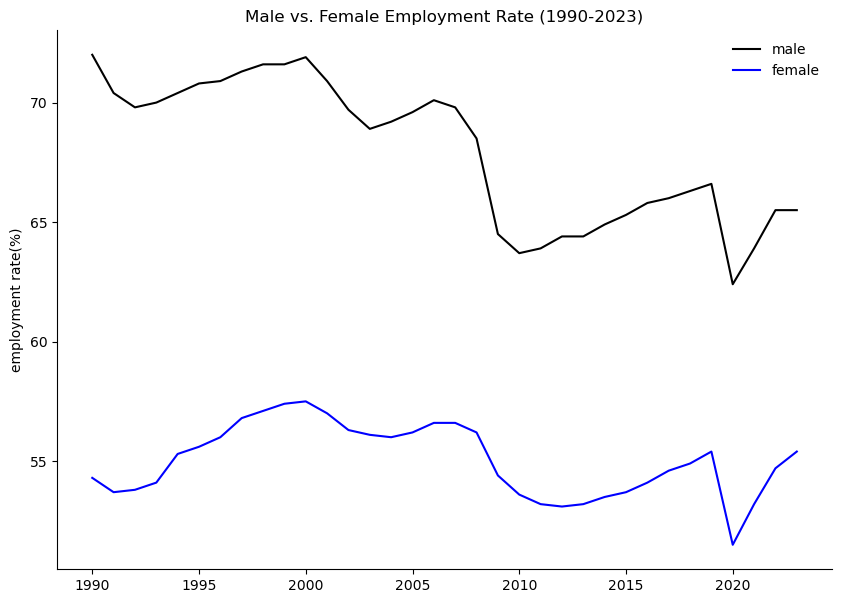

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(male.index, male['employment percentage'], color = 'black', alpha = 1, label = 'male')
ax.plot(female.index, female['employment percentage'], color = 'blue', alpha = 1, label = 'female')

ax.set_ylabel('employment rate(%)')
ax.set_title('Male vs. Female Employment Rate (1990-2023)')

sns.despine(ax=ax)
ax.legend(frameon=False)
plt.show()
fig = ax.get_figure()
fig.savefig("employment comparison.png")